# 範例 : (Kaggle)房價預測精簡版 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
***
- 以下是房價預測的精簡版範例
- 使用最小量的特徵工程以及線性回歸模型做預測, 最後輸出可以在Kaggle提交的預測檔

# [範例重點]
- 精簡後的特徵工程 - 包含補缺失值(fillna). 標籤編碼(LabelEncoder).  
最小最大化(MinMaxScaler) 如何使用在同一個程式區塊中 (In[3])   

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# 載入基本套件
import pandas as pd
import numpy as np

# 載入標籤編碼與最小最大化, 以便做最小的特徵工程
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 讀取訓練與測試資料
data_path = 'C:\\Users\\Master\\'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')
print(df_train.shape)

(1460, 81)


In [2]:
# 訓練資料需要 train_X, train_Y / 預測輸出需要 ids(識別每個預測值), test_X
# 在此先抽離出 train_Y 與 ids, 而先將 train_X, test_X 該有的資料合併成 df, 先作特徵工程
train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3]:
# 特徵工程-簡化版 : 全部空值先補-1, 所有類別欄位先做 LabelEncoder, 然後再與數字欄位做 MinMaxScaler
# 這邊使用 LabelEncoder 只是先將類別欄位用統一方式轉成數值以便輸入模型, 當然部分欄位做 One-Hot可能會更好, 只是先使用最簡單版本作為範例
LEncoder = LabelEncoder()
# 除上述之外, 還要把標籤編碼與數值欄位一起做最大最小化, 這麼做雖然有些暴力, 卻可以最簡單的平衡特徵間影響力
MMEncoder = MinMaxScaler()
for c in df.columns:
    if df[c].dtype == 'object': # 如果是文字型 / 類別型欄位, 就先補缺 'None' 後, 再做標籤編碼
        df[c] = df[c].fillna('None')
        df[c] = LEncoder.fit_transform(df[c]) 
    else: # 其他狀況(本例其他都是數值), 就補缺 -1
        df[c] = df[c].fillna(-1)
    # 最後, 將標籤編碼與數值欄位一起最大最小化, 因為需要是一維陣列, 所以這邊切出來後用 reshape 降維
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.8,0.210191,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.8,0.257962,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,0.25,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.8,0.219745,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.8,0.194268,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.8,0.270701,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,0.25,0.0,1.000000,0.50,1.0,0.8


In [7]:
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X, 因為不論何種特徵工程, 都需要對 train / test 做同樣處理
# 常見並簡便的方式就是 - 先將 train / test 接起來, 做完後再拆開, 不然過程當中往往需要將特徵工程部分寫兩次, 麻煩且容易遺漏
# 在較複雜的特徵工程中尤其如此, 若實務上如果碰到 train 與 test 需要分階段進行, 則通常會另外寫成函數處理
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

# 使用線性迴歸模型 : train_X, train_Y 訓練模型, 並對 test_X 做出預測結果 pred
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
estimator.fit(train_X, train_Y)
pred = estimator.predict(test_X)

In [8]:
# 將輸出結果 pred 與前面留下的 ID(ids) 合併, 輸出成檔案
# 可以下載並點開 house_baseline.csv 查看結果, 以便了解預測結果的輸出格式
# 本範例所與作業所輸出的 csv 檔, 均可用於本題的 Kaggle 答案上傳, 可以試著上傳來熟悉 Kaggle 的介面操作
pred = np.expm1(pred)
sub = pd.DataFrame({'Id': ids, 'SalePrice': pred})
sub.head(10)

C:\Users\Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in expm1
  after removing the cwd from sys.path.


,Id,SalePrice
0,1461,113725.453795
1,1462,156209.997014
2,1463,163158.298675
3,1464,195184.392611
4,1465,184425.659243
5,1466,169758.353580
6,1467,186481.102226
7,1468,166398.562582
8,1469,190069.565913
9,1470,116599.741217


# 範例 : (Kaggle)房價預測
***
- 以下用房價預測資料, 觀察降低資料偏態的影響

# [範例重點]
- 觀察原始數值的散佈圖, 以及線性迴歸分數 (Out[4], Out[5]) 
- 觀察使用log1p降偏態時, 對於分布與迴歸分數的影響 (In[6], Out[6])
- 觀察使用box-cox(λ=0.15)時, 對於分布與迴歸分數的影響 (In[7], Out[7])
- 觀察使用sqrt(box-cox, λ=0.5)時, 對於分布與迴歸分數的影響 (In[8], Out[8])

In [9]:
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'C:\\Users\\Master\\'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [11]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


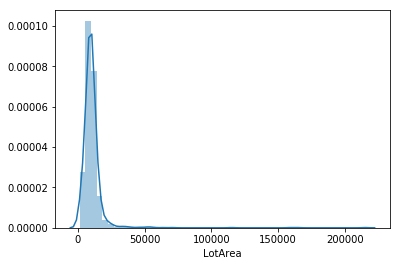

In [13]:
# 顯示 LotArea 的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['LotArea'][:train_num])
plt.show()

In [14]:
df['LotArea'][:train_num]

0        8450
1        9600
2       11250
3        9550
4       14260
5       14115
6       10084
7       10382
8        6120
9        7420
10      11200
11      11924
12      12968
13      10652
14      10920
15       6120
16      11241
17      10791
18      13695
19       7560
20      14215
21       7449
22       9742
23       4224
24       8246
25      14230
26       7200
27      11478
28      16321
29       6324
        ...  
1430    21930
1431     4928
1432    10800
1433    10261
1434    17400
1435     8400
1436     9000
1437    12444
1438     7407
1439    11584
1440    11526
1441     4426
1442    11003
1443     8854
1444     8500
1445     8400
1446    26142
1447    10000
1448    11767
1449     1533
1450     9000
1451     9262
1452     3675
1453    17217
1454     7500
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [15]:
# 計算基礎分數
df_mm = MMEncoder.fit_transform(df)
train_X = df_mm[:train_num]
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8468786929821537

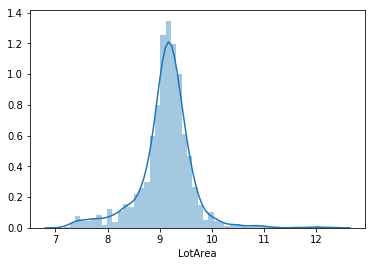

0.8527424841450408


C:\Users\Master\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
# 將 LotArea 取 log1p 後, 看散佈圖, 並計算分數
df_fixed = copy.deepcopy(df)
df_fixed['LotArea'] = np.log1p(df_fixed['LotArea'])
sns.distplot(df_fixed['LotArea'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

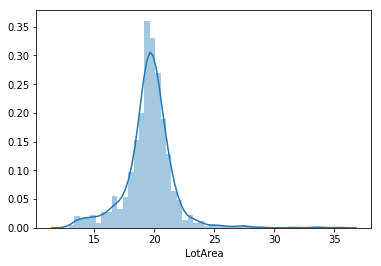

0.8517599350334374


C:\Users\Master\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
# 將 LotArea 取 boxcox 後, 看散佈圖, 並計算分數
from scipy import stats
df_fixed = copy.deepcopy(df)
df_fixed['LotArea'] = stats.boxcox(df_fixed['LotArea'], lmbda=0.15) #boxcox
sns.distplot(df_fixed['LotArea'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

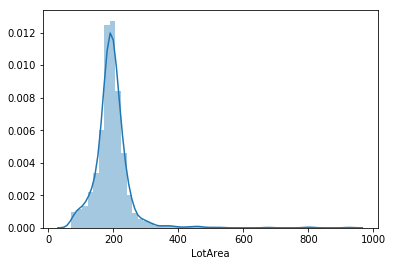

0.8490937061232051


C:\Users\Master\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
# 將 LotArea 取 sqrt (box-cox : alpha=0.5) 後, 看散佈圖, 並計算分數
df_fixed = copy.deepcopy(df)
df_fixed['LotArea'] = stats.boxcox(df['LotArea'], lmbda=0.5)
sns.distplot(df_fixed['LotArea'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

# 範例 : (Kaggle)房價預測
***
- 以下用房價預測資料, 觀查標籤編碼與獨編碼熱的影響

# [範例重點]
- 觀察標籤編碼與獨熱編碼, 在特徵數量 / 線性迴歸分數 / 線性迴歸時間上, 分別有什麼影響 (In[3], Out[3], In[4], Out[4]
- 觀察標籤編碼與獨熱編碼, 在特徵數量 / 梯度提升樹分數 / 梯度提升樹時間上, 分別有什麼影響 (In[5], Out[5], In[6], Out[6]) 

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

data_path = 'C:\\Users\\Master\\'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [21]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Object Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

43 Object Features : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [22]:
df_temp = pd.DataFrame()
df_temp[0] = 3
df_temp

,0


In [24]:
import time

# 標籤編碼 + 線性迴歸
df_temp = pd.DataFrame() #創造一個空的dataframe
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c]) #將object欄位做LabelEncoder()處裡後丟到df_temp裡面
train_X = df_temp[:train_num]
estimator = LinearRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 43)
score : 0.66156068668513
time : 0.03786873817443848 sec


In [25]:
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [26]:
df_temp = pd.DataFrame()
df_temp['MSZoning'] = LabelEncoder().fit_transform(df['MSZoning'])

In [27]:
df_temp.head()

,MSZoning
0,4
1,4
2,4
3,4
4,4


In [29]:
# 獨熱編碼 + 線性迴歸
df_temp = pd.get_dummies(df)
train_X = df_temp[:train_num]
estimator = LinearRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}') #5個fold
print(f'time : {time.time() - start} sec')

shape : (1460, 274)
score : -1.0093497426990682e+23
time : 0.47072768211364746 sec


In [30]:
df_temp.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0


In [31]:
# 標籤編碼 + 梯度提升樹
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
train_X = df_temp[:train_num]
estimator = GradientBoostingRegressor()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 43)
score : 0.7767986909190951
time : 0.6333024501800537 sec


In [32]:
# 獨熱編碼 + 梯度提升樹
df_temp = pd.get_dummies(df)
train_X = df_temp[:train_num]
estimator = GradientBoostingRegressor()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')
#以上看得出來，在梯度提升樹上面用獨熱編碼效果較好

shape : (1460, 274)
score : 0.789599418977408
time : 2.4415383338928223 sec


# 範例 : (Kaggle)房價預測
***
- 以下用房價預測資料, 觀察均值編碼的效果

# [範例重點]
- 觀察標籤編碼與均值編碼, 在特徵數量 / 線性迴歸分數 / 線性迴歸時間上, 分別有什麼影響 (In[3], Out[3], In[4], Out[4]) 
- 觀察標籤編碼與均值編碼, 在特徵數量 / 梯度提升樹分數 / 梯度提升樹時間上, 分別有什麼影響 (In[5], Out[5], In[6], Out[6]) 

In [33]:
data_path = 'C:\\Users\\Master\\'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [34]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Numeric Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

43 Numeric Features : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [35]:
# 對照組 : 標籤編碼 + 線性迴歸
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
train_X = df_temp[:train_num]
estimator = LinearRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 43)
score : 0.66156068668513
time : 0.03789854049682617 sec


In [36]:
# 均值編碼 + 線性迴歸
data = pd.concat([df[:train_num], train_Y], axis=1)
for c in df.columns:
    mean_df = data.groupby([c])['SalePrice'].mean().reset_index()
    mean_df.columns = [c, f'{c}_mean']
    data = pd.merge(data, mean_df, on=c, how='left')
    data = data.drop([c] , axis=1)
data = data.drop(['SalePrice'] , axis=1)
estimator = LinearRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, data, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 43)
score : 0.7624230403717003
time : 0.041861772537231445 sec


In [37]:
data = pd.concat([df[:train_num], train_Y], axis=1)
data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,None,None,None,WD,Normal,12.247699
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,None,None,None,WD,Normal,12.109016
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,None,None,None,WD,Normal,12.317171
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,None,None,None,WD,Abnorml,11.849405
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,None,None,None,WD,Normal,12.429220


In [38]:
mean_df = data.groupby(['MSZoning'])['SalePrice'].mean().reset_index()
mean_df.head()

,MSZoning,SalePrice
0,C (all),11.118275
1,FV,12.246621
2,RH,11.749848
3,RL,12.085891
4,RM,11.692901


In [39]:
mean_df

,MSZoning,SalePrice
0,C (all),11.118275
1,FV,12.246621
2,RH,11.749848
3,RL,12.085891
4,RM,11.692901


In [40]:
data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,None,None,None,WD,Normal,12.247699
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,None,None,None,WD,Normal,12.109016
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,None,None,None,WD,Normal,12.317171
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,None,None,None,WD,Abnorml,11.849405
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,None,None,None,WD,Normal,12.429220


In [41]:
# 對照組 : 標籤編碼 + 梯度提升樹
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
train_X = df_temp[:train_num]
estimator = GradientBoostingRegressor()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 43)
score : 0.7770640846282033
time : 0.6451222896575928 sec


In [42]:
# 均值編碼 + 梯度提升樹
data = pd.concat([df[:train_num], train_Y], axis=1)
for c in df.columns:
    mean_df = data.groupby([c])['SalePrice'].mean().reset_index()
    mean_df.columns = [c, f'{c}_mean']
    data = pd.merge(data, mean_df, on=c, how='left')
    data = data.drop([c] , axis=1)
data = data.drop(['SalePrice'] , axis=1)
estimator = GradientBoostingRegressor()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, data, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 43)
score : 0.8043544235356546
time : 0.6087765693664551 sec


# 範例 : (Kaggle)鐵達尼生存預測

# [教學目標]
- 以下用鐵達尼生存預測資料, 觀察計數編碼與特徵雜湊的效果

# [範例重點]
- 了解計數編碼的寫作方式(In[5], Out[5]), 以及計數編碼搭配邏輯斯迴歸對於測結果有什麼影響 (In[7], Out[7]) 
- 觀察 雜湊編碼, 以及 計數編碼+雜湊編碼 分別搭配邏輯斯迴歸對於測結果有什麼影響 (In[8], Out[8], In[9], Out[9])

In [43]:
data_path = 'C:\\Users\\Master\\'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Object Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

5 Object Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,None,S


In [45]:
# 觀察欄位相異值數量
df.select_dtypes(include=["object"]).apply(pd.Series.nunique)

Name        1307
Sex            2
Ticket       929
Cabin        187
Embarked       4
dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression

# 對照組 : 標籤編碼 + 邏輯斯迴歸
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
df_temp.head()

0.780004837244799


C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

,Name,Sex,Ticket,Cabin,Embarked
0,155,1,720,185,3
1,286,0,816,106,0
2,523,0,914,185,3
3,422,0,65,70,3
4,22,1,649,185,3


In [48]:
# 加上 'Ticket' 欄位的計數編碼
# 第一行 : df.groupby(['Ticket']) 會輸出 df 以 'Ticket' 群聚後的結果, 但因為群聚一類只會有一個值, 因此必須要定義運算
# 例如 df.groupby(['Ticket']).size(), 但欄位名稱會變成 size, 要取別名就需要用語法 df.groupby(['Ticket']).agg({'Ticket_Count':'size'})
# 這樣出來的計數欄位名稱會叫做 'Ticket_Count', 因為這樣群聚起來的 'Ticket' 是 index, 所以需要 reset_index() 轉成一欄
# 因此第一行的欄位, 在第三行按照 'Ticket_Count' 排序後, 最後的 DataFrame 輸出如 Out[5]
count_df = df.groupby(['Ticket'])['Name'].agg({'Ticket_Count':'size'}).reset_index()
# 但是上面資料表結果只是 'Ticket' 名稱對應的次數, 要做計數編碼還需要第二行 : 將上表結果與原表格 merge, 合併於 'Ticket' 欄位
# 使用 how='left' 是完全保留原資料表的所有 index 與順序
df = pd.merge(df, count_df, on=['Ticket'], how='left')
count_df.sort_values(by=['Ticket_Count'], ascending=False).head(10)

C:\Users\Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Ticket,Ticket_Count
778,CA. 2343,11
104,1601,8
775,CA 2144,8
335,3101295,7
454,347077,7
459,347082,7
847,S.O.C. 14879,7
824,PC 17608,7
123,19950,6
49,113781,6


In [49]:
# 印出來看看, 加了計數編碼的資料表 df 有何不同
df.head()

,Name,Sex,Ticket,Cabin,Embarked,Ticket_Count
0,"Braund, Mr. Owen Harris",male,A/5 21171,None,S,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,2
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,None,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,2
4,"Allen, Mr. William Henry",male,373450,None,S,1


In [50]:
# 'Ticket'計數編碼 + 邏輯斯迴歸
df_temp = pd.DataFrame()
for c in object_features:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
df_temp['Ticket_Count'] = df['Ticket_Count']
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
df_temp.head()

0.7811221556805532


C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

,Name,Sex,Ticket,Cabin,Embarked,Ticket_Count
0,155,1,720,185,3,1
1,286,0,816,106,0,2
2,523,0,914,185,3,1
3,422,0,65,70,3,2
4,22,1,649,185,3,1


In [51]:
# 'Ticket'特徵雜湊 + 邏輯斯迴歸
df_temp = pd.DataFrame()
for c in object_features:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
# 這邊的雜湊編碼, 是直接將 'Ticket' 的名稱放入雜湊函數的輸出數值, 為了要確定是緊密(dense)特徵, 因此除以10後看餘數
# 這邊的 10 是隨機選擇, 不一定要用 10, 同學可以自由選擇購小的數字試看看. 基本上效果都不會太好
df_temp['Ticket_Hash'] = df['Ticket'].map(lambda x:hash(x) % 10)
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
df_temp.head()

0.7777702003732906


C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

,Name,Sex,Ticket,Cabin,Embarked,Ticket_Hash
0,155,1,720,185,3,4
1,286,0,816,106,0,7
2,523,0,914,185,3,3
3,422,0,65,70,3,7
4,22,1,649,185,3,3


In [52]:
# 'Ticket'計數編碼 + 'Ticket'特徵雜湊 + 邏輯斯迴歸
df_temp = pd.DataFrame()
for c in object_features:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
df_temp['Ticket_Hash'] = df['Ticket'].map(lambda x:hash(x) % 10)
df_temp['Ticket_Count'] = df['Ticket_Count']
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
df_temp.head()

0.7788875188090448


C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

,Name,Sex,Ticket,Cabin,Embarked,Ticket_Hash,Ticket_Count
0,155,1,720,185,3,4,1
1,286,0,816,106,0,7,2
2,523,0,914,185,3,3,1
3,422,0,65,70,3,7,2
4,22,1,649,185,3,3,1


# 範例 : 計程車費率預測
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

# [教學目標]
- 使用程車費率預測競賽練習時間欄位處理

# [範例重點]
- 觀察時間特徵分解, 在線性迴歸分數 / 梯度提升樹分數上, 分別有什麼影響 (In[2], Out[2], In[3], Out[3]) 
- 觀察加入週期循環特徵, 在線性迴歸分數 / 梯度提升樹分數上, 分別有什麼影響 (In[4], Out[4], In[5], Out[5]) 

In [55]:
import datetime

data_path = 'C:\\Users\\Master\\'
df = pd.read_csv(data_path + 'taxi_data1.csv')

train_Y = df['fare_amount']
df = df.drop(['fare_amount'] , axis=1)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [56]:
# 時間轉換方式 : 使用 datetime.strptime 解析(parse)時間字串 / 使用 datetime.strftime 匯出時間格式(format)
# 參考官網 https://docs.python.org/3/library/datetime.html
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [57]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(df_temp)
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
GDBT = GradientBoostingRegressor()
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Linear Reg Score : 0.026876871475640173
Gradient Boosting Reg Score : 0.7124880351125317


In [58]:
# 加上"日週期"特徵 (參考講義"週期循環特徵")
import math
df['day_cycle'] = df['pickup_hour']/12 + df['pickup_minute']/720 + df['pickup_second']/43200
df['day_cycle'] = df['day_cycle'].map(lambda x:math.sin(x*math.pi))
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,day_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,-0.025450
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,0.333601
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,-0.967083
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,-0.888817
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,0.782427


In [59]:
# 結果 : 預測力反而下降
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Linear Reg Score : 0.026412252675043525
Gradient Boosting Reg Score : 0.710692160766178


# 範例 : 計程車費率預測
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

# [教學目標]
- 使用並觀察特徵組合, 在計程車費率預測競賽的影響

# [範例重點]
- 增加精度差與緯度差兩個特徵, 觀察線性迴歸與梯度提升樹的預測結果有什麼影響 (In[4], Out[4], In[5], Out[5]) 
- 再增加座標距離特徵, 觀察線性迴歸與梯度提升樹的預測結果有什麼影響 (In[6], Out[6], In[7], Out[7])

In [60]:
data_path = 'C:\\Users\\Master\\'
df = pd.read_csv(data_path + 'taxi_data1.csv')

train_Y = df['fare_amount']
df = df.drop(['fare_amount'] , axis=1)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [61]:
# 時間特徵分解方式:使用datetime
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [62]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df = df.drop(['pickup_datetime'] , axis=1)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(df)
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
GDBT = GradientBoostingRegressor()
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Linear Reg Score : 0.026876871475640173
Gradient Boosting Reg Score : 0.7100396263969835


In [63]:
# 增加緯度差, 經度差兩個特徵
df['longitude_diff'] = df['dropoff_longitude'] - df['pickup_longitude']
df['latitude_diff'] = df['dropoff_latitude'] - df['pickup_latitude']
df[['longitude_diff', 'latitude_diff', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].head()

,longitude_diff,latitude_diff,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,0.009452,-0.002437,-73.990580,40.761071,-73.981128,40.758634
1,-0.001244,0.018265,-73.988403,40.723431,-73.989647,40.741695
2,0.003756,-0.007222,-74.015785,40.715110,-74.012029,40.707888
3,0.019292,-0.008437,-73.977322,40.787275,-73.958030,40.778838
4,0.007193,0.032170,-73.989683,40.729717,-73.982490,40.761887


In [64]:
# 結果 : 光是用經緯度差, 準確度就有巨幅上升
train_X = scaler.fit_transform(df)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Linear Reg Score : 0.026777745780496964
Gradient Boosting Reg Score : 0.7956090897715651


In [65]:
# 增加座標距離特徵
df['distance_2D'] = (df['longitude_diff']**2 + df['latitude_diff']**2)**0.5
df[['distance_2D', 'longitude_diff', 'latitude_diff']].head()

,distance_2D,longitude_diff,latitude_diff
0,0.009761,0.009452,-0.002437
1,0.018307,-0.001244,0.018265
2,0.008140,0.003756,-0.007222
3,0.021056,0.019292,-0.008437
4,0.032964,0.007193,0.032170


In [66]:
# 結果 : 加上座標距離後, 準確度再度上升(包含線性迴歸)
train_X = scaler.fit_transform(df)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Linear Reg Score : 0.027473522287347694
Gradient Boosting Reg Score : 0.8047560940882175


# 範例 : (Kaggle)房價預測

# [教學目標]
- 以下用房價預測資料, 觀察群聚編碼的效果

# [範例重點]
- 了解群聚編碼的寫作方式(In[3], Out[3])
- 觀察群聚編碼, 搭配線性迴歸以及隨機森林分別有什麼影響 (In[6]~In[9], Out[6]~Out[9])

In [68]:
data_path = 'C:\\Users\\Master\\'
df = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df['SalePrice'])
df = df.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [69]:
df['SaleCondition'] = df['SaleCondition'].fillna('None')
df['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [70]:
mean_df = df.groupby(['SaleCondition'])['GrLivArea'].mean().reset_index()
mean_df

,SaleCondition,GrLivArea
0,Abnorml,1436.128713
1,AdjLand,1112.500000
2,Alloca,1701.750000
3,Family,1480.950000
4,Normal,1492.968280
5,Partial,1795.696000


In [71]:
mode_df = df.groupby(['SaleCondition'])['GrLivArea'].apply(lambda x: x.mode()[0]).reset_index()
mode_df

,SaleCondition,GrLivArea
0,Abnorml,864
1,AdjLand,980
2,Alloca,1535
3,Family,948
4,Normal,864
5,Partial,1456


In [72]:
# 生活總面積(GrLivArea)對販售條件(SaleCondition)做群聚編碼
# 寫法類似均值編碼, 只是對另一個特徵, 而非目標值
df['SaleCondition'] = df['SaleCondition'].fillna('None')
mean_df = df.groupby(['SaleCondition'])['GrLivArea'].mean().reset_index()
mode_df = df.groupby(['SaleCondition'])['GrLivArea'].apply(lambda x: x.mode()[0]).reset_index()
median_df = df.groupby(['SaleCondition'])['GrLivArea'].median().reset_index()
max_df = df.groupby(['SaleCondition'])['GrLivArea'].max().reset_index()
temp = pd.merge(mean_df, mode_df, how='left', on=['SaleCondition'])
temp = pd.merge(temp, median_df, how='left', on=['SaleCondition'])
temp = pd.merge(temp, max_df, how='left', on=['SaleCondition'])
temp.columns = ['SaleCondition', 'Area_Sale_Mean', 'Area_Sale_Mode', 'Area_Sale_Median', 'Area_Sale_Max']
temp

,SaleCondition,Area_Sale_Mean,Area_Sale_Mode,Area_Sale_Median,Area_Sale_Max
0,Abnorml,1436.128713,864,1302.0,4476
1,AdjLand,1112.500000,980,1143.0,1184
2,Alloca,1701.750000,1535,1439.5,3194
3,Family,1480.950000,948,1390.5,2526
4,Normal,1492.968280,864,1456.0,4316
5,Partial,1795.696000,1456,1646.0,5642


In [73]:
df = pd.merge(df, temp, how='left', on=['SaleCondition'])
df = df.drop(['SaleCondition'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,Area_Sale_Mean,Area_Sale_Mode,Area_Sale_Median,Area_Sale_Max
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,1492.968280,864,1456.0,4316
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,1492.968280,864,1456.0,4316
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,1492.968280,864,1456.0,4316
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,1436.128713,864,1302.0,4476
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,1492.968280,864,1456.0,4316


In [74]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
df.head()

40 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Area_Sale_Mean', 'Area_Sale_Mode', 'Area_Sale_Median', 'Area_Sale_Max']



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Area_Sale_Mean,Area_Sale_Mode,Area_Sale_Median,Area_Sale_Max
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,2,2008,1492.968280,864,1456.0,4316
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,5,2007,1492.968280,864,1456.0,4316
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,9,2008,1492.968280,864,1456.0,4316
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,2,2006,1436.128713,864,1302.0,4476
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,12,2008,1492.968280,864,1456.0,4316


In [75]:
# 沒有這四個新特徵的 dataframe 稱為 df_minus
df_minus = df.drop(['Area_Sale_Mean', 'Area_Sale_Mode', 'Area_Sale_Median', 'Area_Sale_Max'] , axis=1)

# 原始特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df_minus)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8466510874327978

In [76]:
# 新特徵 + 線性迴歸 : 有些微改善
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8492735339540589

In [78]:
from sklearn.ensemble import RandomForestRegressor

# 原始特徵 + 隨機森林
train_X = MMEncoder.fit_transform(df_minus)
estimator = RandomForestRegressor()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8503225487021734

In [79]:
# 新特徵 + 隨機森林
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8579306208779824

# [教學目標]
- 以下用房價預測資料, 展示特徵篩選的作法

# [範例重點]
- 觀察相關係數過濾法的寫作方式(In[2], Out[2], In[4], Out[4]), 以及對線性迴歸與梯度提升機有什麼影響 (In[5]~In[8], Out[5]~Out[8]) 
- 觀察L1 嵌入法的寫作方式(In[9]~In[11], Out[9]~Out[11]), 以及對線性迴歸與梯度提升機有什麼影響 (In[12], Out[12], In[13], Out[13]) 

In [80]:
data_path = 'C:\\Users\\Master\\'
df = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df['SalePrice'])
df = df.drop(['Id'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


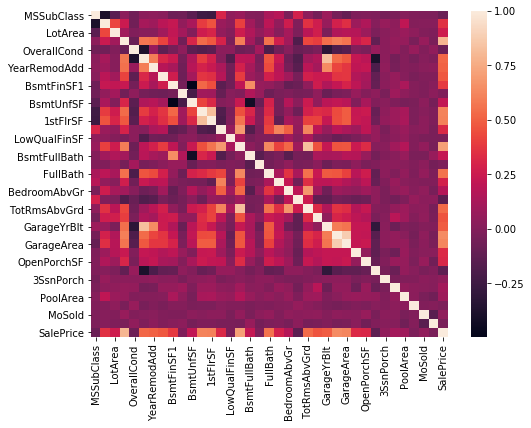

In [81]:
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr)
plt.show()

In [82]:
# 記得刪除 SalePrice
df = df.drop(['SalePrice'] , axis=1)

#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
df.head()

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [83]:
corr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


In [84]:
# 篩選相關係數大於 0.1 或小於 -0.1 的特徵
high_list = list(corr[(corr['SalePrice']>0.1) | (corr['SalePrice']<-0.1)].index)
print(high_list)

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [85]:
high_list.pop(-1) #把SalePrice給刪掉
print(high_list)

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


In [86]:
# 原始特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8466510874327978

In [87]:
# 高相關性特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8288821541594242

In [88]:
# 原始特徵 + 梯度提升樹
train_X = MMEncoder.fit_transform(df)
estimator = GradientBoostingRegressor()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8858312173822261

In [89]:
# 高相關性特徵 + 梯度提升樹
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8745071815632791

In [90]:
from sklearn.linear_model import Lasso
L1_Reg = Lasso(alpha=0.001)
train_X = MMEncoder.fit_transform(df)
L1_Reg.fit(train_X, train_Y)
L1_Reg.coef_

array([-0.12408194, -0.        ,  0.        ,  0.81411198,  0.2970946 ,
        0.33007182,  0.08851589,  0.        ,  0.04287006,  0.        ,
       -0.        ,  0.17513694,  0.11086056,  0.        , -0.        ,
        0.87326328,  0.2040765 ,  0.        ,  0.10285172,  0.03174629,
        0.        , -0.        ,  0.12246045,  0.17953898,  0.01851559,
        0.27672243,  0.03230955,  0.09061659,  0.        ,  0.        ,
        0.        ,  0.09550047, -0.        , -0.        ,  0.        ,
       -0.01874705])

In [91]:
L1_mask = list((L1_Reg.coef_>0) | (L1_Reg.coef_<0))
df.columns[L1_mask]

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'YrSold'],
      dtype='object')

In [92]:
L1_mask

[True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True]

In [93]:
from itertools import compress
x = compress(range(5), (True, False, True, True, False)) #只取顯示True的地方
list(x)

[0, 2, 3]

In [94]:
from itertools import compress
L1_mask = list((L1_Reg.coef_>0) | (L1_Reg.coef_<0))
L1_list = list(compress(list(df), list(L1_mask))) #將List_mask的部分篩選出來的篩選器
L1_list

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'ScreenPorch',
 'YrSold']

In [95]:
# L1_Embedding 特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df[L1_list])
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8475901403725672

In [96]:
# L1_Embedding 特徵 + 梯度提升樹
train_X = MMEncoder.fit_transform(df[L1_list])
estimator = GradientBoostingRegressor()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8843430028059498

# 範例 : (Kaggle)房價預測

# [教學目標]
- 以下用房價預測資料, 練習特徵重要性的寫作與觀察
- 由於只有樹狀模型有特徵重要性, 故以隨機森林為模型作為範例

# [範例重點]
- 使用擬合過的模型, 計算特徵重要性 (In[4], Out[4]) 
- 對照原始特徵, 觀察特徵重要性較高的一半特徵, 搭配隨機森林對於測結果的影響 (In[5], Out[5], In[6], Out[6])
- 重組重要性最高的特徵作為新特徵, 觀察效果如何 (In[9], Out[9]) 

In [97]:
data_path = 'C:\\Users\\Master\\'
df = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df['SalePrice'])
df = df.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [98]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.210191,0.033420,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.257962,0.038795,1.0,0.0,1.0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.219745,0.046507,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.194268,0.038561,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.270701,0.060576,1.0,0.0,0.0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


In [99]:
# 隨機森林擬合後, 將結果依照重要性由高到低排序
estimator = RandomForestRegressor()
estimator.fit(df.values, train_Y)
# estimator.feature_importances_ 就是模型的特徵重要性, 這邊先與欄位名稱結合起來, 才能看到重要性與欄位名稱的對照表
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

OverallQual     5.457264e-01
GrLivArea       1.158646e-01
GarageCars      5.349690e-02
TotalBsmtSF     4.769126e-02
GarageArea      2.761198e-02
1stFlrSF        2.182912e-02
YearBuilt       2.028981e-02
LotArea         1.527657e-02
BsmtFinSF1      1.487929e-02
OverallCond     1.311690e-02
YearRemodAdd    8.422694e-03
MSZoning        7.290921e-03
BsmtUnfSF       6.174495e-03
CentralAir      6.133148e-03
GarageYrBlt     5.983013e-03
LotFrontage     5.908421e-03
Neighborhood    5.850029e-03
GarageType      5.843002e-03
2ndFlrSF        5.097207e-03
FireplaceQu     4.338644e-03
Fireplaces      3.892624e-03
MasVnrArea      3.754561e-03
OpenPorchSF     3.193783e-03
BsmtFinType1    3.078381e-03
TotRmsAbvGrd    3.040948e-03
MoSold          2.957786e-03
GarageFinish    2.636000e-03
WoodDeckSF      2.513766e-03
KitchenAbvGr    2.183017e-03
Exterior1st     2.126256e-03
                    ...     
ScreenPorch     6.763456e-04
ExterQual       6.451952e-04
Condition1      6.173277e-04
HalfBath      

In [100]:
# 原始特徵 + 隨機森林
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8508388388994895

In [101]:
# 高重要性特徵 + 隨機森林 (39大約是79的一半)
high_feature = list(feats[:39].index)
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8538099541520813

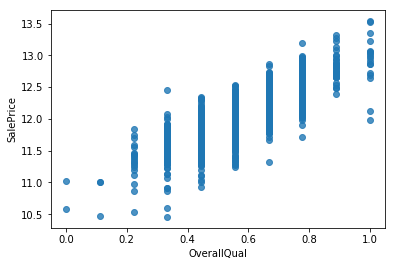

In [102]:
# 觀察重要特徵與目標的分布
# 第一名 : OverallQual              
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df['OverallQual'], y=train_Y, fit_reg=False)
plt.show()

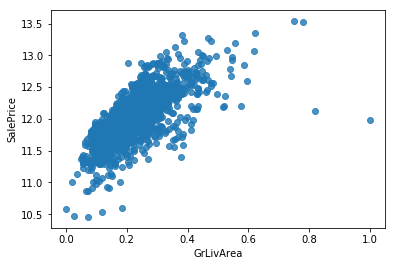

In [103]:
# 第二名 : GrLivArea
sns.regplot(x=df['GrLivArea'], y=train_Y, fit_reg=False)
plt.show()

In [104]:
# 製作四特徵 : 加, 乘, 互除(分母加1避免除0) 看效果 (Note: 數值原本已經最大最小化介於 [0,1] 區間, 這四種新特徵也會落在 [0,1] 區間)
df['Add_char'] = (df['GrLivArea'] + df['OverallQual']) / 2
df['Multi_char'] = df['GrLivArea'] * df['OverallQual']
df['GO_div1p'] = df['GrLivArea'] / (df['OverallQual']+1) * 2
df['OG_div1p'] = df['OverallQual'] / (df['GrLivArea']+1) * 2
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8577831856890141

# 作業 : (Kaggle)鐵達尼生存預測

# [教學目標]
- 以下用鐵達尼預測資料, 展示如何使用葉編碼, 並觀察預測效果
- 因為只有分類問題比較適合葉編碼, 因此範例與作業都使用鐵達尼的資料(二元分類問題)

# [教學目標]
- 了解葉編碼的寫作方式 : 使用梯度提升樹 (In[3]~In[5], Out[3]~Out[5])
- 觀察葉編碼搭配邏輯斯迴歸後的效果 (In[6], Out[6], In[7], Out[7])

In [105]:
# 因為擬合(fit)與編碼(transform)需要分開, 因此不使用.get_dummy, 而採用 sklearn 的 OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

data_path = 'C:\\Users\\Master\\'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId', 'Survived'] , axis=1)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df['Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [107]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [108]:
df.values

array([[1.        , 0.12134831, 1.        , ..., 0.01415106, 0.        ,
        1.        ],
       [0.        , 0.21348315, 0.        , ..., 0.13913574, 0.55782313,
        0.33333333],
       [1.        , 0.39662921, 0.        , ..., 0.01546857, 0.        ,
        1.        ],
       ...,
       [1.        , 0.46404494, 0.        , ..., 0.04577135, 0.        ,
        1.        ],
       [0.        , 0.09101124, 1.        , ..., 0.0585561 , 0.41496599,
        0.33333333],
       [1.        , 0.24719101, 1.        , ..., 0.01512699, 0.        ,
        0.66666667]])

In [109]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [110]:
train_X = df.values
# 因為訓練邏輯斯迴歸時也要資料, 因此將訓練及切成三部分 train / val / test, 採用 test 驗證而非 k-fold 交叉驗證
# train 用來訓練梯度提升樹, val 用來訓練邏輯斯迴歸, test 驗證效果
train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y, test_size=0.5)
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.5)

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

# 梯度提升樹調整參數並擬合後, 再將葉編碼 (*.apply) 結果做獨熱 / 邏輯斯迴歸
# 調整參數的方式採用 RandomSearchCV 或 GridSearchCV, 以後的進度會再教給大家, 本次先直接使用調參結果
gdbt = GradientBoostingClassifier(subsample=0.93, n_estimators=320, min_samples_split=0.1, min_samples_leaf=0.3, 
                                  max_features=4, max_depth=4, learning_rate=0.16)
onehot = OneHotEncoder()
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

gdbt.fit(train_X, train_Y)
onehot.fit(gdbt.apply(train_X)[:, :, 0])
lr.fit(onehot.transform(gdbt.apply(val_X)[:, :, 0]), val_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
gdbt.apply(train_X)[:, :, 0]

array([[2., 2., 2., ..., 1., 1., 2.],
       [2., 2., 2., ..., 2., 2., 1.],
       [1., 1., 1., ..., 2., 2., 1.],
       ...,
       [2., 2., 1., ..., 1., 1., 1.],
       [1., 1., 2., ..., 1., 1., 1.],
       [2., 2., 1., ..., 2., 2., 1.]])

In [114]:
# 將梯度提升樹+葉編碼+邏輯斯迴歸結果輸出
pred_gdbt_lr = lr.predict_proba(onehot.transform(gdbt.apply(test_X)[:, :, 0]))[:, 1]
fpr_gdbt_lr, tpr_gdbt_lr, _ = roc_curve(test_Y, pred_gdbt_lr)
# 將梯度提升樹結果輸出
pred_gdbt = gdbt.predict_proba(test_X)[:, 1]
fpr_gdbt, tpr_gdbt, _ = roc_curve(test_Y, pred_gdbt)

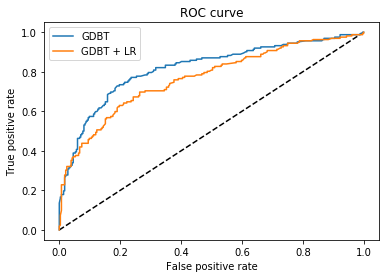

In [115]:
import matplotlib.pyplot as plt
# 將結果繪圖
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gdbt, tpr_gdbt, label='GDBT')
plt.plot(fpr_gdbt_lr, tpr_gdbt_lr, label='GDBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()